In [1]:
# Importer les libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importer les données parquet

df = pd.read_parquet("../data/finance_ml_dataset.parquet", engine="fastparquet")
print(df.head())


        date          Open          High           Low         Close  \
0 2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   
1 2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2 2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3 2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4 2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   

      Adj Close     Volume                                    headline_concat  \
0  11734.320312  212830000  b"Georgia 'downs two Russian warplanes' as cou...   
1  11782.349609  183190000  b'Why wont America and Nato help us? If they w...   
2  11642.469727  173590000  b'Remember that adorable 9-year-old who sang a...   
3  11532.959961  182550000  b' U.S. refuses Israel weapons to attack Iran:...   
4  11615.929688  159790000  b'All the experts admit that we should legalis...   

                                       reddit_concat       F_1       F_2  \
0  b

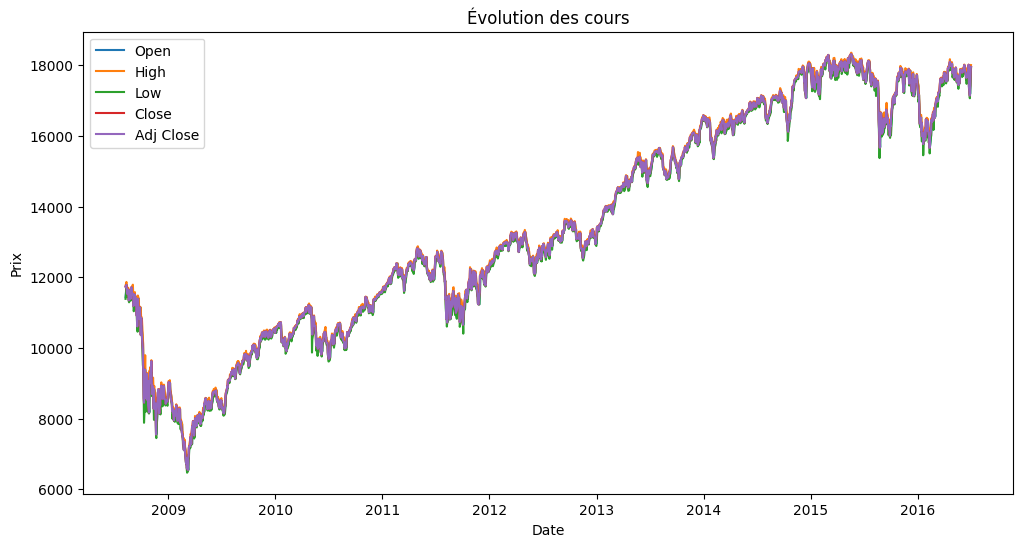

In [3]:
# Visualiser les cours

plt.figure(figsize=(12, 6))

cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for col in cols:
    plt.plot(df['date'], df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Évolution des cours')
plt.legend()
plt.show()


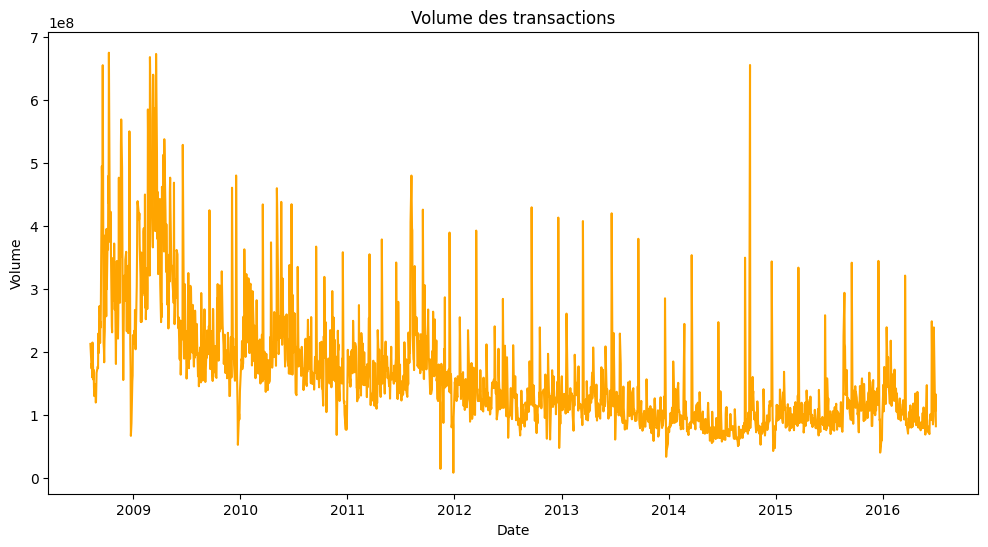

In [4]:
# Visualiser les volumes

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Volume'], color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume des transactions')
plt.show()

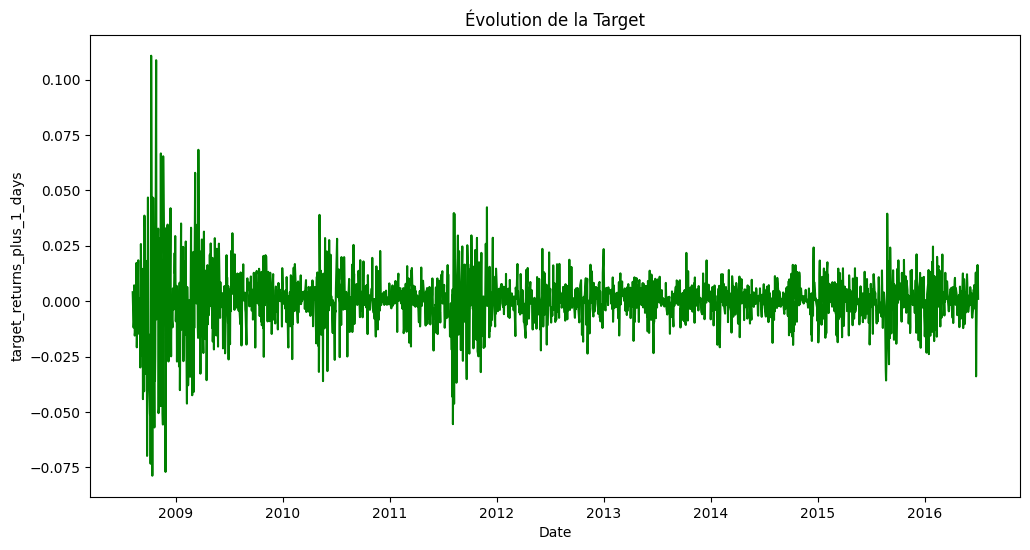

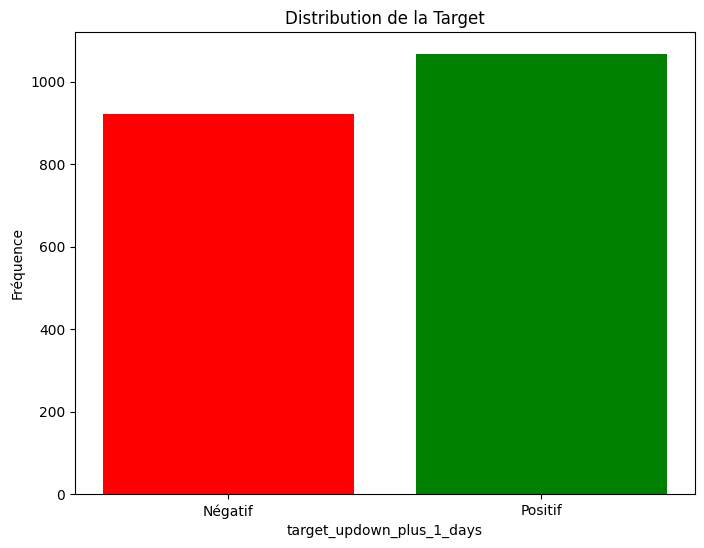

In [5]:
# Visualiser la target

# Avec les valeurs

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['target_returns_plus_1_days'], color='green')
plt.xlabel('Date')
plt.ylabel('target_returns_plus_1_days')
plt.title('Évolution de la Target')
plt.show()


# Positif vs Négatif

plt.figure(figsize=(8, 6))
plt.bar(['Négatif', 'Positif'], 
        [sum(df['target_updown_plus_1_days'] == 0), sum(df['target_updown_plus_1_days'] == 1)], 
        color=['red', 'green'])
plt.xlabel('target_updown_plus_1_days')
plt.ylabel('Fréquence')
plt.title('Distribution de la Target')
plt.show()

In [6]:
# Analyse des valeurs manquantes

missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])


# Faire ressortir la date de la valeur manquante

missing_dates = df[df.isnull().any(axis=1)]['date']
print("Date avec valeurs manquante :", missing_dates)

## Il s'agit de la dernière date, ce qui est normal car les targets ne peuvent pas être calculées pour cette date (1 jour de plus nécessaire).
## Il faut donc la supprimer pour l'entraînement du modèle.

Valeurs manquantes par colonne :
F_7                           1
target_returns_plus_1_days    1
dtype: int64
Date avec valeurs manquante : 1988   2016-07-01
Name: date, dtype: datetime64[ns]


In [7]:
# Supprimer la ligne (la dernière) ayant une valeur manquante

df_clean = df.dropna().reset_index(drop=True)

print("Valeurs manquantes après nettoyage :", df_clean.isnull().sum().sum())

Valeurs manquantes après nettoyage : 0


In [8]:
# Enregistrer le nouveau fichier parquet sans valeurs manquantes

df_clean.to_parquet("../data/finance_ml_dataset_clean.parquet", engine="fastparquet", index=False)

In [9]:
# Corrélation entre les features et la target

col_num = df_clean.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_clean[col_num].corr()
target_correlation = correlation_matrix['target_updown_plus_1_days'].sort_values(ascending=False)
print("Corrélation des features avec la target :")
print(target_correlation)



Corrélation des features avec la target :
target_updown_plus_1_days     1.000000
target_returns_plus_1_days    0.642700
F_3                           0.081857
F_1                           0.061428
F_5                           0.056015
F_7                           0.033372
F_4                           0.030522
Open                         -0.010256
Low                          -0.010951
High                         -0.012015
Close                        -0.013033
Adj Close                    -0.013033
Volume                       -0.017750
F_2                          -0.023628
F_6                          -0.028958
Name: target_updown_plus_1_days, dtype: float64
